# Final Project : Investigate Baseball Data Set

From the baseball dataset (click [here](http://www.seanlahman.com/)), what I found is that there four main tables containing players information, batting,pitching and fielding stat supplemented by other dataset such as salaries, awards, managers info and so on. In this project, I focused on batting data and salary dataset. 
Primary question is how does the performance metrics determine a palyer's salary? 
- To simplify the answer, we took couple of performance metrics as independent variables and salary as a dependent variable. We took a closer look at the tables and wrangled the data as necessary. Once we have clean dataset for exploration, we created several type of plots to visualize the correlation among the variables and understood which variable has higher/lower significance in increased salary.

Second question: how the style of making scores have changed over the year?

- To find the scoring style of players over the years we considered the 'Teams.csv' table to work on. My goal was to observe how the players have scored from the begining of baseball game till now. I took homerun and stolen base as preferred style and tried to understand if the style has been changed over time or not.  

Other questions I could try to answers but were not focused
-Manager's and players combo effort to win the game/get awarded.
-Which player won the most awards? Does it depend on winning or loosing games?
-Which Manager won the highest games in a single season or in his career? Does number of wins place you in half of fame?

So in order to make the investigation easy to read and intertpret the results,I followed the below steps:


1. Loading DataSet
2. Wrangling Data Set
3. Exploratory Analysis and Visualization
4. Conclusions



    

# Question 1
How does performance metrics determine a player's salary?


## Loading and Review Data


In [1]:
# Loading Batting and Salary Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

salaries_df = pd.read_csv('salaries.csv')
batting_df = pd.read_csv('Batting.csv')


print (len(salaries_df['playerID']))
print (len(batting_df['playerID']))

26428
107429


## Wrangling Dataset


In [2]:
#Checking the battery data for missing info 
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107429 entries, 0 to 107428
Data columns (total 22 columns):
playerID    107429 non-null object
yearID      107429 non-null int64
stint       107429 non-null int64
teamID      107429 non-null object
lgID        106691 non-null object
G           107429 non-null int64
AB          107429 non-null int64
R           107429 non-null int64
H           107429 non-null int64
2B          107429 non-null int64
3B          107429 non-null int64
HR          107429 non-null int64
RBI         106673 non-null float64
SB          105061 non-null float64
CS          83888 non-null float64
BB          107429 non-null int64
SO          105329 non-null float64
IBB         70778 non-null float64
HBP         104612 non-null float64
SH          101360 non-null float64
SF          71325 non-null float64
GIDP        81988 non-null float64
dtypes: float64(9), int64(10), object(3)
memory usage: 18.0+ MB


In [3]:
#Checking the salary data for missing info 
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


There are many missing values in the batting table those need to be cleared. Also there are not so important metrics those can be excluded from the table.Salary data table is fine.

In [4]:

#merging batting and salary data
bat_sal = pd.merge(batting_df,salaries_df,on=['playerID','yearID'],how='inner')

#filtering out players with no salary data
bat_sal = bat_sal[(bat_sal['salary'].isnull() == False)]

# resetting the index and dropping it

bat_sal.reset_index(inplace=True)
bat_sal = bat_sal.drop('index',axis=1)

print (bat_sal)

        playerID  yearID  stint teamID_x lgID_x    G   AB   R    H  2B  ...  \
0      ackerji01    1985      1      TOR     AL   61    0   0    0   0  ...   
1      agostju01    1985      1      CHA     AL   54    0   0    0   0  ...   
2      aguaylu01    1985      1      PHI     NL   91  165  27   46   7  ...   
3      alexado01    1985      1      TOR     AL   36    0   0    0   0  ...   
4      allenne01    1985      1      SLN     NL   23    2   0    0   0  ...   
...          ...     ...    ...      ...    ...  ...  ...  ..  ...  ..  ...   
28289  zieglbr01    2016      2      BOS     AL   33    0   0    0   0  ...   
28290  zimmejo02    2016      1      DET     AL   19    4   0    1   0  ...   
28291  zimmery01    2016      1      WAS     NL  115  427  60   93  18  ...   
28292  zobribe01    2016      1      CHN     NL  147  523  94  142  31  ...   
28293   zychto01    2016      1      SEA     AL   12    0   0    0   0  ...   

       BB     SO  IBB  HBP   SH   SF  GIDP  teamID_

In [5]:
bat_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28294 entries, 0 to 28293
Data columns (total 25 columns):
playerID    28294 non-null object
yearID      28294 non-null int64
stint       28294 non-null int64
teamID_x    28294 non-null object
lgID_x      28294 non-null object
G           28294 non-null int64
AB          28294 non-null int64
R           28294 non-null int64
H           28294 non-null int64
2B          28294 non-null int64
3B          28294 non-null int64
HR          28294 non-null int64
RBI         28294 non-null float64
SB          28294 non-null float64
CS          28294 non-null float64
BB          28294 non-null int64
SO          28294 non-null float64
IBB         28294 non-null float64
HBP         28294 non-null float64
SH          28294 non-null float64
SF          28294 non-null float64
GIDP        28294 non-null float64
teamID_y    28294 non-null object
lgID_y      28294 non-null object
salary      28294 non-null int64
dtypes: float64(9), int64(11), object(5)
me

Normalization of variables

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
column_names_to_normalize = ['AB', 'R', 'H','2B','3B','HR','RBI','SB','CS','BB','SO','IBB','HBP','SH','SF','GIDP','salary']
x = bat_sal[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
bat_sal_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = bat_sal.index)
bat_sal[column_names_to_normalize] = bat_sal_temp

print (bat_sal_temp)

             AB         R         H        2B        3B        HR       RBI  \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2      0.230447  0.177632  0.175573  0.118644  0.130435  0.082192  0.127273   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0.002793  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
28289  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
28290  0.005587  0.000000  0.003817  0.000000  0.000000  0.000000  0.000000   
28291  0.596369  0.394737  0.354962  0.305085  0.043478  0.205479  0.278788   
28292  0.730447  0.618421  0.541985  0.525424  0.130435  0.246575  0.460606   
28293  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

             SB        CS        BB        SO      

Now if we want to explore how salary of a player has changed based on performance metrics over time, that would be an interesting stat. For that, we have to standardized the salary data and then we can figure out the relationship between yearly salary and available performance metrics such as HR, RBI, R, batting average(BA),on base percentage(OBP). Batting average and on base percentage have to calculated using the follwing formulas.

In [9]:
#batting average - how many hits a player has per at-bat
bat_sal['AVG'] = ((bat_sal['H'].apply(float))/(bat_sal['AB'].apply(float)))

#on-base percentage- how often a player reaches base [hits]+[walks]+[hit by pitch]/[at-bats]+[walks]+[hit by pitch]+[sacrifice flies]
bat_sal['OBP'] = (((bat_sal['H'].apply(float))+(bat_sal['BB'])+(bat_sal['HBP'])))/((bat_sal['AB'].apply(float))+(bat_sal['SF'])+(bat_sal['BB'])+(bat_sal['HBP']))


In [10]:
print (bat_sal['AVG'])

print (bat_sal['OBP'])


0             NaN
1             NaN
2        0.761878
3             NaN
4        0.000000
           ...   
28289         NaN
28290    0.683206
28291    0.595205
28292    0.741991
28293         NaN
Name: AVG, Length: 28294, dtype: float64
0             NaN
1             NaN
2        0.656337
3             NaN
4        0.000000
           ...   
28289         NaN
28290    0.683206
28291    0.511696
28292    0.716327
28293         NaN
Name: OBP, Length: 28294, dtype: float64


In [11]:
# getting distribution of batting average

print (bat_sal['AVG'].describe())

count    21817.000000
mean         0.575763
std          0.330533
min          0.000000
25%          0.431499
50%          0.657603
75%          0.752871
max          2.732824
Name: AVG, dtype: float64


In [12]:
#getting distribution of on base percentage

print(bat_sal['OBP'].describe())

count    21881.000000
mean         0.564233
std          0.307128
min          0.000000
25%          0.456830
50%          0.617060
75%          0.715098
max          2.732824
Name: OBP, dtype: float64


From the above data, it is clear that some batting average and on base performance data are missing. It might be the absence of 'AB' value which indicates that those players never appeared at bat or pitchers who did not have to bat at all or never hit a ball. Let's clear them and get a tidy data set.

In [13]:
bat_sal[bat_sal['AVG'].isnull()]

,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,IBB,HBP,SH,SF,GIDP,teamID_y,lgID_y,salary,AVG,OBP
0,ackerji01,1985,1,TOR,AL,61,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,TOR,AL,0.005152,NaN,NaN
1,agostju01,1985,1,CHA,AL,54,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,CHA,AL,0.004470,NaN,NaN
3,alexado01,1985,1,TOR,AL,36,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,TOR,AL,0.026515,NaN,NaN
5,allenne01,1985,2,NYA,AL,17,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,SLN,NL,0.022727,NaN,NaN
11,atherke01,1985,1,OAK,AL,56,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,OAK,AL,0.003253,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28282,wrighmi01,2016,1,BAL,AL,18,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,BAL,AL,0.015470,NaN,NaN
28284,yateski01,2016,1,NYA,AL,41,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NYA,AL,0.015512,NaN,NaN
28288,zieglbr01,2016,1,ARI,NL,36,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,ARI,NL,0.166667,NaN,NaN
28289,zieglbr01,2016,2,BOS,AL,33,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,ARI,NL,0.166667,NaN,NaN


In [14]:
bat_sal[bat_sal['OBP'].isnull()]

,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,IBB,HBP,SH,SF,GIDP,teamID_y,lgID_y,salary,AVG,OBP
0,ackerji01,1985,1,TOR,AL,61,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,TOR,AL,0.005152,NaN,NaN
1,agostju01,1985,1,CHA,AL,54,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,CHA,AL,0.004470,NaN,NaN
3,alexado01,1985,1,TOR,AL,36,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,TOR,AL,0.026515,NaN,NaN
5,allenne01,1985,2,NYA,AL,17,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,SLN,NL,0.022727,NaN,NaN
11,atherke01,1985,1,OAK,AL,56,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,OAK,AL,0.003253,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28282,wrighmi01,2016,1,BAL,AL,18,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,BAL,AL,0.015470,NaN,NaN
28284,yateski01,2016,1,NYA,AL,41,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NYA,AL,0.015512,NaN,NaN
28288,zieglbr01,2016,1,ARI,NL,36,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,ARI,NL,0.166667,NaN,NaN
28289,zieglbr01,2016,2,BOS,AL,33,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,ARI,NL,0.166667,NaN,NaN


In [15]:
bat_sal_clean = bat_sal.dropna(subset=['AVG'])

In [16]:
bat_sal_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21817 entries, 2 to 28292
Data columns (total 27 columns):
playerID    21817 non-null object
yearID      21817 non-null int64
stint       21817 non-null int64
teamID_x    21817 non-null object
lgID_x      21817 non-null object
G           21817 non-null int64
AB          21817 non-null float64
R           21817 non-null float64
H           21817 non-null float64
2B          21817 non-null float64
3B          21817 non-null float64
HR          21817 non-null float64
RBI         21817 non-null float64
SB          21817 non-null float64
CS          21817 non-null float64
BB          21817 non-null float64
SO          21817 non-null float64
IBB         21817 non-null float64
HBP         21817 non-null float64
SH          21817 non-null float64
SF          21817 non-null float64
GIDP        21817 non-null float64
teamID_y    21817 non-null object
lgID_y      21817 non-null object
salary      21817 non-null float64
AVG         21817 non-null 

## Exploratory Analysis and Visualization

First, I will look at each of these features independently to see their distributions.
Next, I will evaluate relatonships between the standardized salary and each of the features mentioned before. To accomplish this, linear regression plots of each comparing the standardized salary scores with the above metrics will be created.
I predict positive relationships for Home Runs and on base percentage categories (HR,OBP), but not strong positive relationships for the others (BA, R, RBIs)


In [17]:
# creationg histogram plot and distribution data for baseball metrics

def make_histogram(data, key_name, xlabel = None, ylabel = None, title = None, bin_number = None):
    make_hist = data[key_name].hist(bins = bin_number,edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);
    return make_hist

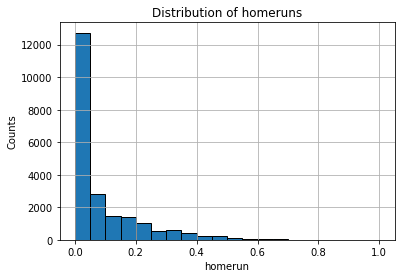

In [18]:
homerun_histogram = make_histogram(bat_sal_clean, 'HR', xlabel = 'homerun', ylabel = 'Counts', title = 'Distribution of homeruns', bin_number = 20)

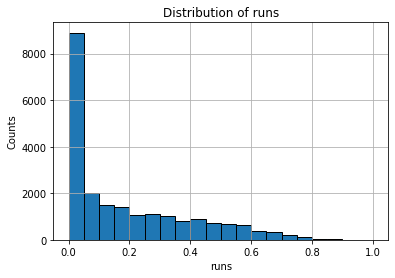

In [19]:
runs_histogram = make_histogram(bat_sal_clean, 'R', xlabel = 'runs', ylabel = 'Counts', title = 'Distribution of runs', bin_number = 20)

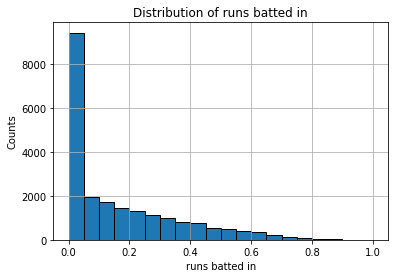

In [20]:
rbi_histogram = make_histogram(bat_sal_clean, 'RBI', xlabel = 'runs batted in', ylabel = 'Counts', title = 'Distribution of runs batted in', bin_number = 20)

In [21]:
#Using stats to better understand the above visualization using the describe function
#Getting distribution of score of homerun, rub batted in and runs

print (bat_sal_clean['HR'].describe(),bat_sal_clean['R'].describe(),bat_sal_clean['RBI'].describe())

count    21817.000000
mean         0.084867
std          0.124334
min          0.000000
25%          0.000000
50%          0.027397
75%          0.123288
max          1.000000
Name: HR, dtype: float64 count    21817.000000
mean         0.185887
std          0.207523
min          0.000000
25%          0.006579
50%          0.105263
75%          0.315789
max          1.000000
Name: R, dtype: float64 count    21817.000000
mean         0.163361
std          0.189533
min          0.000000
25%          0.006061
50%          0.084848
75%          0.272727
max          1.000000
Name: RBI, dtype: float64


Observations:

The distriution data shows that a player scored 6 homeruns on average with 27 runs and 28 runs batted in. The standard deviation is quite high for all of the features.

In [22]:
def standardize(df):
    return (df - df.mean()) / (df.std())

In [23]:
#standardizing the salary data with respect to year
bat_sal_clean['sal_z'] = bat_sal_clean.groupby('yearID')['salary'].apply(standardize)

print (bat_sal_clean['sal_z'])

2       -0.711280
4        0.733912
6       -0.660572
7       -0.673249
8        1.522711
           ...   
28286   -0.132161
28287    0.218484
28290    2.010669
28291    1.387300
28292    0.841853
Name: sal_z, Length: 21817, dtype: float64


/Users/lailashahreen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
#visualization of different classical baseball metrics vs salary 

def make_scatter(data, x_key_name, y_key_name, xlabel = None, ylabel = None, title = None):
    make_scatter = plt.scatter(x = data[x_key_name], y = data[y_key_name])
    x = data[x_key_name]
    y = data[y_key_name]
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    return make_scatter

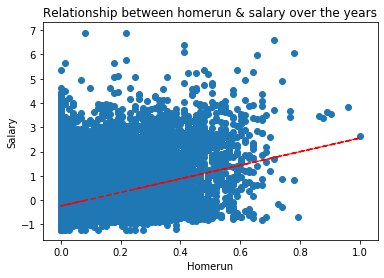

In [25]:
homerun_scatterplot = make_scatter(bat_sal_clean, 'HR', 'sal_z', 'Homerun', 'Salary', 'Relationship between homerun & salary over the years')

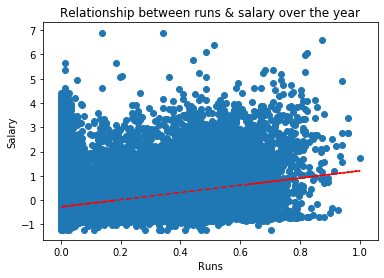

In [26]:
runs_scatterplot = make_scatter(bat_sal_clean,'R','sal_z', 'Runs', 'Salary','Relationship between runs & salary over the year')

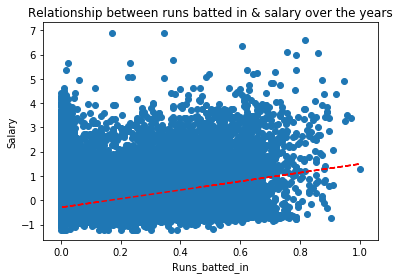

In [27]:
rbi_salary_scatterplot = make_scatter(bat_sal_clean,'RBI','sal_z','Runs_batted_in','Salary','Relationship between runs batted in & salary over the years')

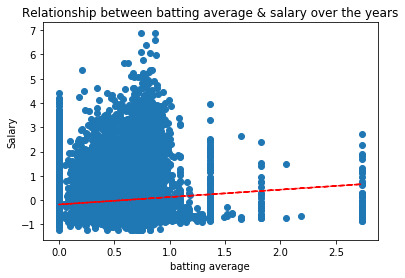

In [28]:
batting_average_scatterplot = make_scatter(bat_sal_clean,'AVG','sal_z','batting average','Salary','Relationship between batting average & salary over the years')

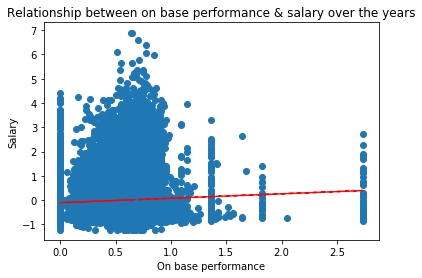

In [29]:
on_base_performance_scatterplot = make_scatter(bat_sal_clean,'OBP','sal_z','On base performance','Salary','Relationship between on base performance & salary over the years')

In [30]:
bat_sal_clean.corr(method='pearson')

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,SO,IBB,HBP,SH,SF,GIDP,salary,AVG,OBP,sal_z
yearID,1.000000e+00,0.019704,-0.026749,-0.012700,-0.014805,-0.015489,0.022032,-0.047269,0.029186,-0.009753,...,0.083557,-0.064393,0.091969,-0.086284,-0.039167,0.001589,0.375159,-0.060544,-0.038713,-1.736770e-16
stint,1.970366e-02,1.000000,-0.246164,-0.180853,-0.162707,-0.170628,-0.163979,-0.103141,-0.127275,-0.156485,...,-0.169570,-0.104106,-0.112291,-0.114502,-0.132788,-0.151561,-0.002062,-0.011468,-0.002754,-1.190553e-02
G,-2.674860e-02,-0.246164,1.000000,0.942990,0.899150,0.927684,0.883661,0.595552,0.731413,0.867950,...,0.835680,0.548193,0.591293,0.127028,0.737069,0.796734,0.131244,0.407732,0.280948,2.097682e-01
AB,-1.270021e-02,-0.180853,0.942990,1.000000,0.958262,0.988489,0.940969,0.634313,0.779007,0.921432,...,0.878385,0.564987,0.623814,0.140987,0.779289,0.846746,0.186957,0.448598,0.316478,2.721886e-01
R,-1.480470e-02,-0.162707,0.899150,0.958262,1.000000,0.969121,0.929305,0.644478,0.833200,0.929739,...,0.851468,0.593029,0.633615,0.091043,0.757400,0.784508,0.210355,0.440851,0.315049,3.086012e-01
H,-1.548881e-02,-0.170628,0.927684,0.988489,0.969121,1.000000,0.952162,0.641275,0.784448,0.929727,...,0.840795,0.585835,0.618419,0.112331,0.779259,0.842455,0.195247,0.467068,0.324567,2.853534e-01
2B,2.203201e-02,-0.163979,0.883661,0.940969,0.929305,0.952162,1.000000,0.567811,0.778959,0.913115,...,0.821905,0.573663,0.612313,0.057977,0.764830,0.811992,0.200075,0.442276,0.303833,2.677281e-01
3B,-4.726863e-02,-0.103141,0.595552,0.634313,0.644478,0.641275,0.567811,1.000000,0.365132,0.505808,...,0.518691,0.283049,0.354187,0.196504,0.436269,0.416257,0.015064,0.293059,0.212464,8.065194e-02
HR,2.918614e-02,-0.127275,0.731413,0.779007,0.833200,0.784448,0.778959,0.365132,1.000000,0.921385,...,0.812823,0.632557,0.559820,-0.135448,0.671734,0.680894,0.266766,0.343379,0.237673,3.474952e-01
RBI,-9.753119e-03,-0.156485,0.867950,0.921432,0.929739,0.929727,0.913115,0.505808,0.921385,1.000000,...,0.853620,0.646921,0.605368,-0.023627,0.807097,0.818175,0.239414,0.424158,0.279250,3.391390e-01


## Observations

As expected, the relationship between homeruns scored and standardized salary is stronger than other features (pearson correlation coefficicent sal_z vs HR is 0.347) followed by RBI (pearson correlation co-efficicent is 0.33). Batting Average, Runs, On base percentage have not shown significant positive correlation with salary. To establish better correlation, we may have to include other features such as metrics from pitching table and fielding dataset. For future analysis, this could be an interesting starting point.

# Question 2
The second question that came up to mind is how the style of making scores have changed over the year? The supplemental data table 'Teams.csv' has yearly stats and standings that could be useful for such analysis. 


## Loading and Review Data

In [31]:
#Loading team data for various mertrics 
team_df=pd.read_csv('Teams.csv')

team_df.head()


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [32]:
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 48 columns):
yearID            2925 non-null int64
lgID              2875 non-null object
teamID            2925 non-null object
franchID          2925 non-null object
divID             1408 non-null object
Rank              2925 non-null int64
G                 2925 non-null int64
Ghome             2526 non-null float64
W                 2925 non-null int64
L                 2925 non-null int64
DivWin            1380 non-null object
WCWin             744 non-null object
LgWin             2897 non-null object
WSWin             2568 non-null object
R                 2925 non-null int64
AB                2925 non-null int64
H                 2925 non-null int64
2B                2925 non-null int64
3B                2925 non-null int64
HR                2925 non-null int64
BB                2924 non-null float64
SO                2909 non-null float64
SB                2799 non-null float64
CS  

Looks like there are many fields with null vaules and should be cleared before any analysis could be done properly.

## Data Wrangling


In [33]:
# Filtering out the unnecessary columns from team_df table:
team_performance = team_df.filter(items=['yearID','W','L','HR','RBI','SB','SO','BB','CS'])

# Grouping the team performance by yearID:
team_performance_stat = team_performance.groupby(['yearID']).mean()

print (team_performance_stat)

                W          L          HR         SB           SO          BB  \
yearID                                                                         
1871    13.888889  13.888889    5.222222  49.000000    19.444444   43.666667   
1872    16.181818  16.181818    3.363636  29.888889    24.090909   23.909091   
1873    21.888889  21.888889    5.222222  39.250000    30.888889   41.875000   
1874    28.875000  28.875000    5.000000  30.250000    44.625000   29.750000   
1875    25.769231  25.769231    3.076923  48.384615    51.923077   19.153846   
...           ...        ...         ...        ...          ...         ...   
2015    80.966667  80.966667  163.633333  83.500000  1248.200000  469.100000   
2016    80.900000  80.900000  187.000000  84.566667  1299.400000  502.933333   
2017    81.000000  81.000000  203.500000  84.233333  1336.800000  527.633333   
2018    81.033333  81.033333  186.166667  82.466667  1373.566667  522.866667   
2019    80.966667  80.966667  225.866667

In [34]:
#Checking values:
team_performance_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 1871 to 2019
Data columns (total 7 columns):
W     149 non-null float64
L     149 non-null float64
HR    149 non-null float64
SB    139 non-null float64
SO    149 non-null float64
BB    149 non-null float64
CS    107 non-null float64
dtypes: float64(7)
memory usage: 9.3 KB


looks like column 'SB' and 'CS' have few null vallues. Probably there were no occurance of SB in that year. So we need to clean those and analyse new set of data.

In [50]:
#Checking missing values:
team_performance_stat[team_performance_stat['CS'].isnull()]


,W,L,HR,SB,SO,BB,CS
yearID,,,,,,,
1876,32.125000,32.125000,5.000000,NaN,73.625000,42.000000,NaN
1877,29.500000,29.500000,4.000000,NaN,121.000000,57.500000,NaN
1878,30.000000,30.000000,3.833333,NaN,180.166667,60.666667,NaN
1879,39.500000,39.500000,7.250000,NaN,230.375000,63.500000,NaN
1880,41.500000,41.500000,7.750000,NaN,249.125000,92.500000,NaN
1881,41.750000,41.750000,9.500000,NaN,223.000000,129.125000,NaN
1882,40.500000,40.500000,12.714286,NaN,238.928571,113.714286,NaN
1883,48.687500,48.687500,14.875000,NaN,330.875000,145.562500,NaN
1884,45.727273,45.727273,20.878788,NaN,449.606061,149.909091,NaN


In [51]:
#cleaning missing values:
team_performance_clean = team_performance_stat.dropna(subset=['SB','CS'])

In [52]:
team_performance_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 1871 to 2019
Data columns (total 7 columns):
W     107 non-null float64
L     107 non-null float64
HR    107 non-null float64
SB    107 non-null float64
SO    107 non-null float64
BB    107 non-null float64
CS    107 non-null float64
dtypes: float64(7)
memory usage: 6.7 KB


Since the null values have been taken care of, we can plot the yearly scores such as homeruns and stolen bases trends and how it has changed over time. 

## Data Exploration 

yearID
1871      5.222222
1872      3.363636
1873      5.222222
1874      5.000000
1875      3.076923
           ...    
2015    163.633333
2016    187.000000
2017    203.500000
2018    186.166667
2019    225.866667
Name: HR, Length: 107, dtype: float64
yearID
1871    49.000000
1872    29.888889
1873    39.250000
1874    30.250000
1875    48.384615
          ...    
2015    83.500000
2016    84.566667
2017    84.233333
2018    82.466667
2019    76.000000
Name: SB, Length: 107, dtype: float64


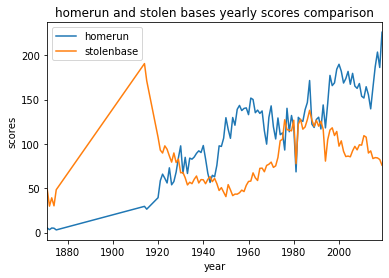

In [53]:
# Visualizing homerun and stolen base scores profile over time:
home_run= team_performance_clean.groupby('yearID')['HR'].mean()
stolen_base = team_performance_clean.groupby('yearID')['SB'].mean()


print (home_run)
print (stolen_base)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pylab 

home_run.plot(label='homerun')
stolen_base.plot(label='stolenbase')
plt.legend()
plt.xlabel('year')
plt.ylabel('scores')
plt.title('homerun and stolen bases yearly scores comparison')
plt.show()


## Observations:

- From the plot, it is obvious that the earlier games during 19th century, the stolen base was more dominant score than homerun. Players used to take risk and contribute in total scoring using their best instinct of stealing bases. But this trend has changed over time. 

- After 1900, the homerun is more favorite among players. Does this trend tell anything about safe playing by current players or risk avertion?

May be we can tell more by analysing the caught stealing data and creating new features those influences the trend.

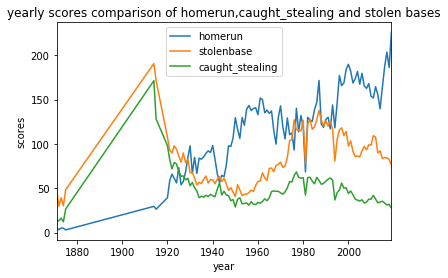

In [54]:
# How caught stealing plays a role in the trend:
caught_stealing = team_performance_clean.groupby('yearID')['CS'].mean()

home_run.plot(label='homerun')
stolen_base.plot(label='stolenbase')
caught_stealing.plot(label='caught_stealing')
plt.legend()
plt.xlabel('year')
plt.ylabel('scores')
plt.title('yearly scores comparison of homerun,caught_stealing and stolen bases')
plt.show()

- To my interest, the stealing bases and caught during stealing lines have similar characteristics. Between year 1920-1950, homeruns started to pick up and this style continued to increase until now.

- Stealing bases returned and around lates 80's both stealing bases and homeruns showed comparable scores. But after year of 2000, scoring by stealing bases started to fall down. Certainly,the number of caught stealing follows the trend.

# Conclusions:

Interestingly, for the first quest, the classical performance metrics such as homerun, runs batted in have greater effect on average yearly salary and they have increased over the years. Also the answer for second question have shown how home run became preferable among batters in last couple of decades. That might be the reason for a stronger relation among salary increase and home run scored over the time. But it should not concluded as the only reason. There might be other features such as players position could be of consideration to find the relationship. 
